In [ ]:
## https://www.youtube.com/watch?v=FTKEFU7AUmA&list=PLkLJ2rVD2nes6E0CYxVNNYr1emKxqQfOb&index=1&t=614s

## importando as bibliotecas
!pip install yfinance
!pip install fix_yahoo_finance

import pandas as pd
import pandas_datareader as pdr

from pandas_datareader import data as pdr  # para baixas os dados do Yahoo Finance
import yfinance as yfin
import datetime
yfin.pdr_override()

import scipy.stats as scs # importando um pacote pra calcular a assimetria e a curtose para a estatística descritiva
import numpy as np
import math
import scipy.optimize as sco

In [ ]:
## Dar cor para os gráficos: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
from pylab import mpl, plt # importando o pacote

plt.style.use('seaborn') # mudando a cor da paleta dos gráficos
mpl.rcParams['font.family'] = 'serif' # mudando a fonte dos gráficos

In [ ]:
## Importanto os dados do Yahoo Finance
tickers=['VALE3.SA', 'PETR3.SA', 'ITUB3.SA', 'BBDC3.SA', 'ABEV3.SA', 'WEGE3.SA']

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2021, 1, 1)
df = pdr.get_data_yahoo(tickers, start, end)
df

[*********************100%%**********************]  6 of 6 completed


Price       Adj Close                                                         \
Ticker       ABEV3.SA   BBDC3.SA   ITUB3.SA   PETR3.SA   VALE3.SA   WEGE3.SA   
Date                                                                           
2016-01-04  12.837882   6.536999   8.934561   3.098253   7.579956   4.892628   
2016-01-05  13.039290   6.587936   9.124079   3.019636   7.478411   5.129905   
2016-01-06  12.912477   6.471329   9.069933   2.880268   6.928880   5.012938   
2016-01-07  12.569340   6.264040   8.961638   2.798077   6.516731   4.869233   
2016-01-08  12.733450   6.251087   9.100875   2.808797   6.295723   4.845839   
...               ...        ...        ...        ...        ...        ...   
2020-12-22  13.411975  16.614618  22.863813  10.320132  60.705223  34.461514   
2020-12-23  13.403326  16.969721  23.211996  10.542551  60.998478  34.366863   
2020-12-28  13.636805  17.113123  23.568466  10.620396  60.963573  35.729805   
2020-12-29  13.792455  17.111408  23.477274  10.627810  60.795979  35.564163   
2020-12-30  13.533036  16.778606  23.153971  10.694535  61.061325  35.843376   

Price           Close                                   ...       Open  \
Ticker       ABEV3.SA   BBDC3.SA   ITUB3.SA   PETR3.SA  ...   ITUB3.SA   
Date                                                    ...              
2016-01-04  17.209999   9.501977  14.000000   8.670000  ...  14.769696   
2016-01-05  17.480000   9.567833  14.296969   8.450000  ...  14.212121   
2016-01-06  17.309999   9.398490  14.212121   8.060000  ...  14.236363   
2016-01-07  16.850000   9.097438  14.042424   7.830000  ...  14.036363   
2016-01-08  17.070000   9.078622  14.260606   7.860000  ...  14.175757   
...               ...        ...        ...        ...  ...        ...   
2020-12-22  15.510000  20.107437  27.580000  27.840000  ...  27.490000   
2020-12-23  15.500000  20.537189  28.000000  28.440001  ...  27.629999   
2020-12-28  15.770000  20.710743  28.430000  28.650000  ...  28.170000   
2020-12-29  15.950000  20.396694  28.320000  28.670000  ...  28.410000   
2020-12-30  15.650000  20.000000  27.930000  28.850000  ...  28.389999   

Price                                          Volume                    \
Ticker       PETR3.SA   VALE3.SA   WEGE3.SA  ABEV3.SA BBDC3.SA ITUB3.SA   
Date                                                                      
2016-01-04   8.310000  12.490000   5.715384  13206900  4196686   278520   
2016-01-05   8.730000  12.670000   5.653846  10774200  2977923    99825   
2016-01-06   8.220000  12.080000   5.711538   7739100  2438801   181995   
2016-01-07   7.720000  11.260000   5.626923  15316400  3045525   221925   
2016-01-08   8.000000  11.070000   5.638461  10684000  3234941   122100   
...               ...        ...        ...       ...      ...      ...   
2020-12-22  27.760000  86.860001  36.330002  15406100  5629767   363200   
2020-12-23  27.969999  86.529999  36.514999  11560800  5290725   598700   
2020-12-28  28.799999  87.790001  36.500000  11958000  5303430   775800   
2020-12-29  28.799999  87.970001  37.924999  13638800  3672471   266100   
2020-12-30  28.850000  87.190002  37.685001  19432700  8569220   800800   

Price                                     
Ticker      PETR3.SA  VALE3.SA  WEGE3.SA  
Date                                      
2016-01-04  16912500   4587900   7878780  
2016-01-05   9146500   2693500   7329660  
2016-01-06   9908400   6758900   6549660  
2016-01-07  10777500   6450400   6017700  
2016-01-08  10759800   4429400   5050500  
...              ...       ...       ...  
2020-12-22   8388700  23157000   5199800  
2020-12-23   5874900  17710200   4806600  
2020-12-28   7255700  26001300   6838800  
2020-12-29   7363400  19727500   6130200  
2020-12-30  20928700  30102700  12375400  

[1245 rows x 36 columns]

In [ ]:
## Vamos usar a os preços ajustados
precos=df['Adj Close']
precos

Ticker,ABEV3.SA,BBDC3.SA,ITUB3.SA,PETR3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,
2016-01-04,12.837882,6.536999,8.934561,3.098253,7.579956,4.892628
2016-01-05,13.039290,6.587936,9.124079,3.019636,7.478411,5.129905
2016-01-06,12.912477,6.471329,9.069933,2.880268,6.928880,5.012938
2016-01-07,12.569340,6.264040,8.961638,2.798077,6.516731,4.869233
2016-01-08,12.733450,6.251087,9.100875,2.808797,6.295723,4.845839
...,...,...,...,...,...,...
2020-12-22,13.411975,16.614618,22.863813,10.320132,60.705223,34.461514
2020-12-23,13.403326,16.969721,23.211996,10.542551,60.998478,34.366863
2020-12-28,13.636805,17.113123,23.568466,10.620396,60.963573,35.729805


In [ ]:
## Exportando os preços ajustados para o excel
precos.to_csv('precos.csv', encoding='utf-8', index=True)
#precos.to_excel('precos.xlsx', encoding='utf-8', index=True)

In [ ]:
## Trocando o nome das colunas
precos.columns = ['AMBEV', 'BRADESCO', 'ITAU', 'PETRO', 'VALE', 'WEGE']  # A ordem de apresentação mudou com relação aos preços baixados
# quando os preços ajustados foram baixados estavam em uma ordem diferente, assim coloquei na ordem que apareceu na saída do "precos=df['Adj Close']"

precos
#precos.head() # os primeiros preços
#precos.tail()  # os ultimos preços

,AMBEV,BRADESCO,ITAU,PETRO,VALE,WEGE
Date,,,,,,
2016-01-04,12.837882,6.536999,8.934561,3.098253,7.579956,4.892628
2016-01-05,13.039290,6.587936,9.124079,3.019636,7.478411,5.129905
2016-01-06,12.912477,6.471329,9.069933,2.880268,6.928880,5.012938
2016-01-07,12.569340,6.264040,8.961638,2.798077,6.516731,4.869233
2016-01-08,12.733450,6.251087,9.100875,2.808797,6.295723,4.845839
...,...,...,...,...,...,...
2020-12-22,13.411975,16.614618,22.863813,10.320132,60.705223,34.461514
2020-12-23,13.403326,16.969721,23.211996,10.542551,60.998478,34.366863
2020-12-28,13.636805,17.113123,23.568466,10.620396,60.963573,35.729805


In [ ]:
# vamos chamar de rótulos os títulos das colunas
rotulo=['AMBEV', 'BRADESCO', 'ITAU', 'PETRO', 'VALE', 'WEGE']
rotulo
precos.columns=rotulo

<Axes: xlabel='Date'>

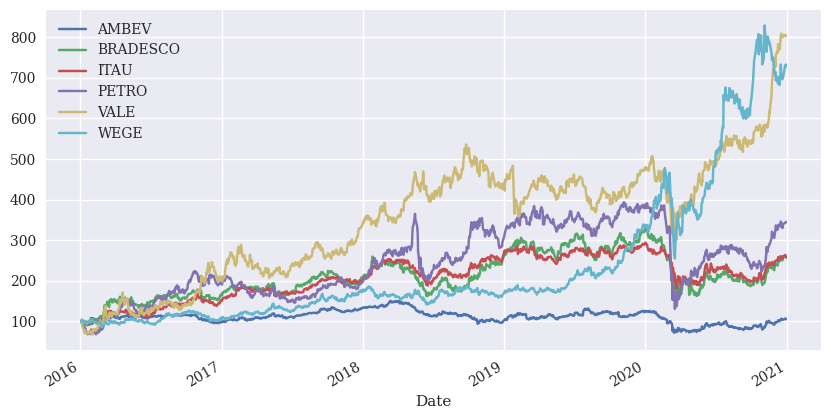

In [ ]:
## Plotando os gráficos

# perceba que as escalas dos preços são bem diferentes
# então vamos plotar os gráficos dos preços na base 100, pq assim todos começam no 100
# a primeira linha será chamada de 100, e as outras correspondem as variações percentuais sempre em relação a primeira linha
precos.iloc[0]  # pega os primeiros preços
(precos/precos.iloc[0]*100)

# plotando o gráfico
(precos/precos.iloc[0]*100).plot(figsize=(10,5))

In [ ]:
## Estimando os retornos diários das ações: variação percentual- {[preço_t/preço_t-1]-1}
retornos=precos.pct_change()
retornos
retornos=retornos.dropna()  #retirando os números em branco
retornos

,AMBEV,BRADESCO,ITAU,PETRO,VALE,WEGE
Date,,,,,,
2016-01-05,0.015689,0.007792,0.021212,-0.025375,-0.013396,0.048497
2016-01-06,-0.009725,-0.017700,-0.005934,-0.046154,-0.073482,-0.022801
2016-01-07,-0.026574,-0.032032,-0.011940,-0.028536,-0.059483,-0.028667
2016-01-08,0.013056,-0.002068,0.015537,0.003831,-0.033914,-0.004805
2016-01-11,-0.015817,-0.019171,-0.025500,-0.035623,-0.028463,-0.022758
...,...,...,...,...,...,...
2020-12-22,0.005837,0.015866,0.006202,0.010159,0.000921,0.011249
2020-12-23,-0.000645,0.021373,0.015229,0.021552,0.004831,-0.002747
2020-12-28,0.017419,0.008450,0.015357,0.007384,-0.000572,0.039659


array([[<Axes: title={'center': 'AMBEV'}>,
        <Axes: title={'center': 'BRADESCO'}>],
       [<Axes: title={'center': 'ITAU'}>,
        <Axes: title={'center': 'PETRO'}>],
       [<Axes: title={'center': 'VALE'}>,
        <Axes: title={'center': 'WEGE'}>]], dtype=object)

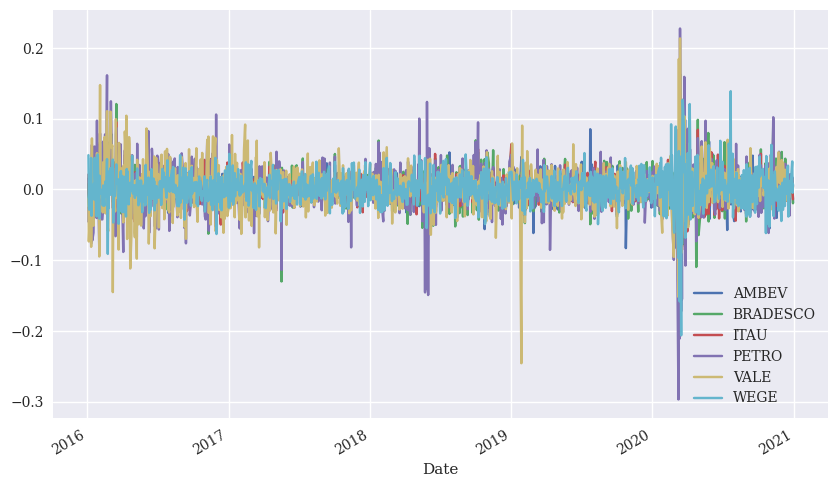

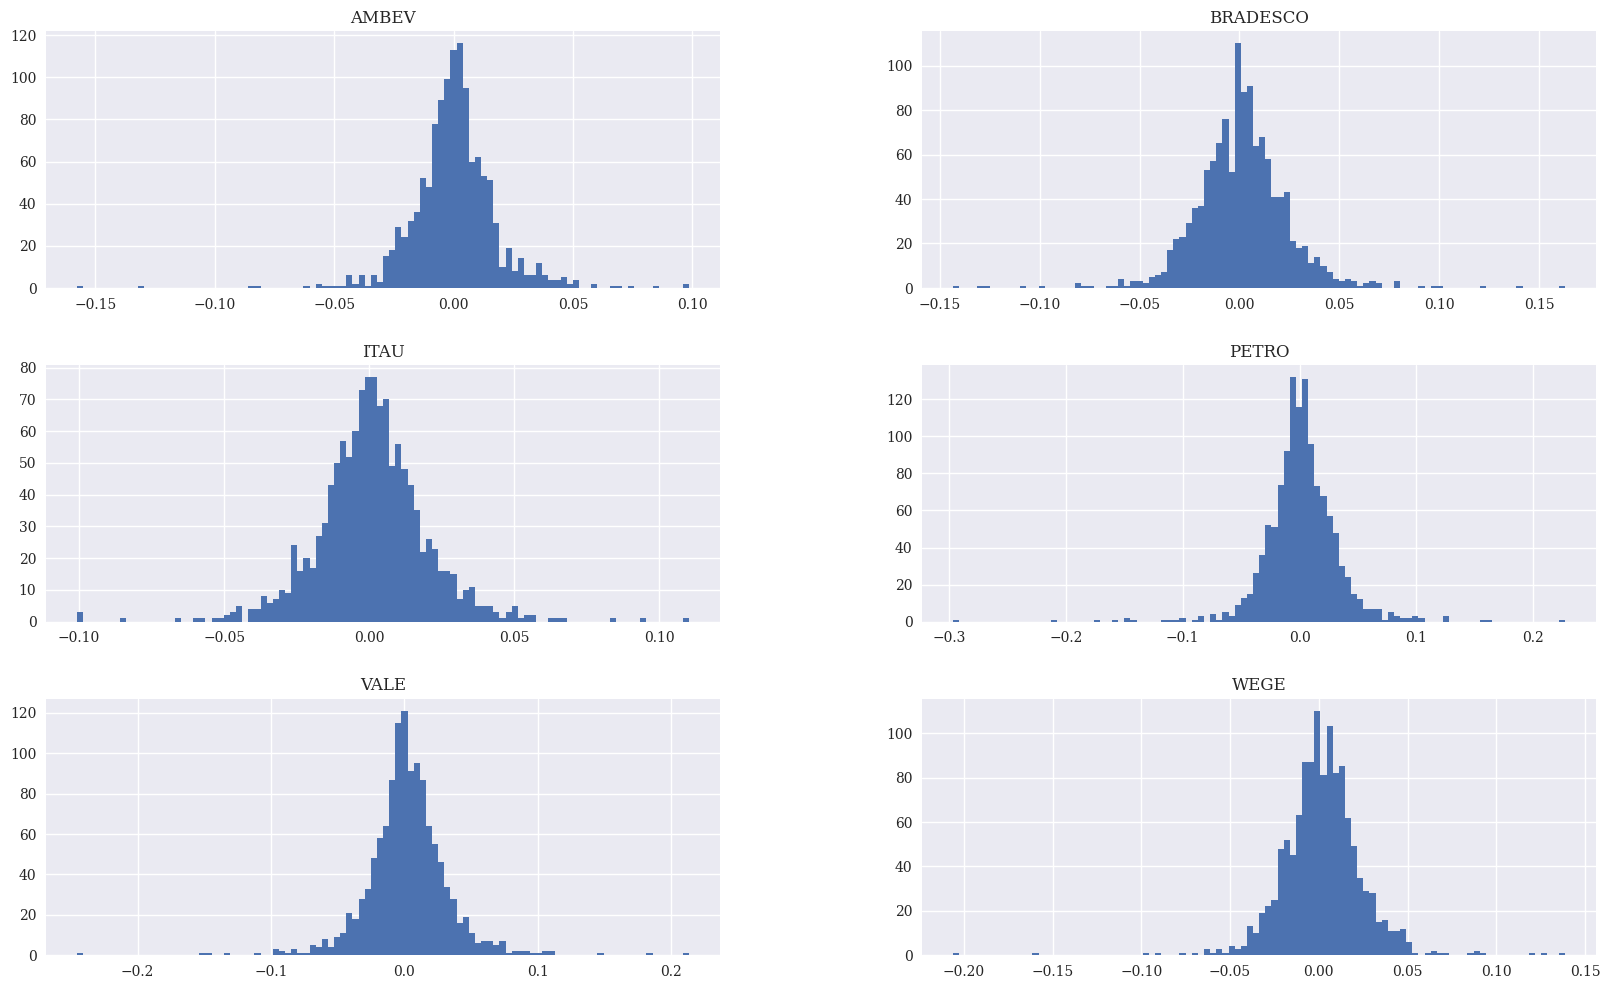

In [ ]:
## Plotando o gráfico dos retornos
retornos.plot(figsize=(10,6))

## Plotando os histogramas dos retornos
retornos.hist(bins=100, figsize=(20,12))

In [ ]:
## Estatística descritiva: média, mínimo, máximo, desvio padrão, assimetria e curtose

# Verificando a assimetria dos preços: a assimetria mostra se a distribuição (histograma) é simétrica, tanto do lado esquerdo quanto do lado direito, dá média.
# Se ela for assimétrica negativamente tem mais valores do lado esquerdo, tem mais retornos negativos do que positivos, abaixo da média.
# Se ela for assimétrica positivamente tem mais valores do lado direito, tem mais retornos positivos do que negativos, acima da média.
# geralmente, em séries de retorno, sao assimétricas de forma negativa, uma vez que os retornos negativos são maiores que os retornos positivos. Isso relete as notícias.
# uma notícia ruim impacta mais no mercado do que uma notícia boa.

scs.skew(retornos) # calculando a assimestria (skewness)
scs.kurtosis(retornos) # calculando a curtose (kutosis)
stat=scs.describe(retornos) # calculando a estatística descritiva

In [ ]:
# Arrumando os resultados do scs.describe - ele já todos os valores que precisamos
Coluna=['AMBEV', 'BRADESCO', 'ITAU', 'PETRO', 'VALE', 'WEGE']
Coluna
Linhas=["Mínimo", "Máximo", "Média", "Variância", "Desvio Padrão", "Assimetria", "Curtose"]
Linhas

minimo=stat[1][0] #grupo 1, dentro do grupo 1, 0 é o mínimo
maximo=stat[1][1] #grupo 1, dentro do grupo 1,1 é o máximo
media=stat[2]
variancia=stat[3]
desvio_padrao= variancia**(1/2)
assimetria=stat[4]
curtose=stat[5]
estat_desc=[minimo, maximo, media, variancia, desvio_padrao, assimetria, curtose]
estat_desc

df=pd.DataFrame(estat_desc, index=Linhas, columns=Coluna)
df

,AMBEV,BRADESCO,ITAU,PETRO,VALE,WEGE
Mínimo,-0.157818,-0.143498,-0.100791,-0.296758,-0.245592,-0.206197
Máximo,0.098712,0.163276,0.110330,0.227554,0.213579,0.138944
Média,0.000205,0.001041,0.000946,0.001529,0.002144,0.001863
Variância,0.000322,0.000567,0.000360,0.001045,0.000927,0.000517
Desvio Padrão,0.017952,0.023811,0.018981,0.032331,0.030451,0.022741
Assimetria,-0.471422,0.148636,-0.029255,-0.631584,-0.092393,-0.442706
Curtose,9.886027,6.469415,3.898589,12.266389,8.282822,10.307040


In [ ]:
################################# AGORA VAMOS FAZER A ANÁLISE DAS CARTEIRAS


# Estimação dos retornos esperados [e_r]; variância (var) e desvio padrão (desvio_pad)
t=rotulo
t
e_r=retornos.mean()  # retornos esperados - é a média
e_r
var=retornos.var()  # variância dos retornos
var
desvio_pad=var**0.5  # desvio padrão dos retornos
desvio_pad


# Passo II) Estimação da matriz de covariância - a diagonal principal são as variâncias (compare a variância da VALE nessa matriz com o valor da variância encontrada pela estatística descritiva = 0.000805)
# os elementos fora da diagonal principal são as covariâncias entre dois ativos
matriz_cov=retornos.cov()
matriz_cov

,AMBEV,BRADESCO,ITAU,PETRO,VALE,WEGE
AMBEV,0.000322,0.000217,0.000170,0.000238,0.000146,0.000169
BRADESCO,0.000217,0.000567,0.000375,0.000492,0.000287,0.000229
ITAU,0.000170,0.000375,0.000360,0.000357,0.000193,0.000174
PETRO,0.000238,0.000492,0.000357,0.001045,0.000530,0.000298
VALE,0.000146,0.000287,0.000193,0.000530,0.000927,0.000182
WEGE,0.000169,0.000229,0.000174,0.000298,0.000182,0.000517


In [ ]:
################################# AGORA VAMOS FAZER A ANÁLISE DA CARTEIRA COM "N" ATIVOS

# Estimação dos retornos esperados [e_r]; variância (var) e desvio padrão (volatilidade)
p_ret=[] #cria um conjunto vazio
p_vol=[]
p_pesos=[]

In [ ]:
## Decidindo o número de ativos que vai compor a carteira
# noa = número de ativos
noa=len(retornos.columns) # são 6 ativos 'AMBEV', 'BRADESCO', 'ITAU', 'PETRO', 'VALE', 'WEGE'

In [ ]:
## Número de portifólios que desejo simular
# nop = número de portifólios
nop=10000  #simula 10000 carteiras

for portifolios in range(nop) :   # gerar portifolios de 1 a 10000 (lembrand que colocamos que nop=10000)
  pesos=np.random.random(noa)  # gerando pesos aleatórios, mas lembrando que a soma dos pesos dos ativos da carteira deve somar 100%
  pesos=pesos/np.sum(pesos)  # normalizando os pesos para que a soma dos pesos seja 100%   # np é o pacote
  p_pesos.append(pesos)  # adicionando os pesos no conjunto vazio que criei antes
## Encontrando os desvio padrão - VOLATILIDADE
  var=matriz_cov.mul(pesos, axis=0).mul(pesos, axis=1).sum().sum()
  dp=np.sqrt(var)
  p_vol.append(dp)  # adicionando os desvios padrão no conjunto vazio que criei antes
## Encontrando os retornos
  returns=np.dot(pesos, e_r)  # multiplica os pesos pelos retornos esperados  # e_r são retornos esperados - é a média
  p_ret.append(returns)  # adicionando os retornos no conjunto vazio que criei antes

In [ ]:
#p_pesos  #deu certo - tem 10000 pesos, a soma da linha tem que dar 100%
#p_vol  #deu certo - tem 10000 desvios
#p_ret  #deu certo - tem 10000 retornos

In [ ]:
## Organizando os dados do p_ret, p_pesos e p_vol
p_ret=np.array(p_ret) #deixa de ser um dado solto e vira uma série numérica
p_ret
p_vol=np.array(p_vol) #deixa de ser um dado solto e vira uma série numérica
p_vol

array([0.02115364, 0.02114156, 0.01982311, ..., 0.01845442, 0.01848409,
       0.01973615])

In [ ]:
## Montando um datafram com p_vol e p_ret
dados={'Retorno':p_ret, 'Risco':p_vol}
portifolios=pd.DataFrame(dados)
portifolios  #tem que aparecer 10000 linhas pq estamos considerando a simulação de 10000 carteiras [nop=10000]

,Retorno,Risco
0,0.001464,0.021154
1,0.001447,0.021142
2,0.001127,0.019823
3,0.001363,0.019240
4,0.001209,0.021218
...,...,...
9995,0.001316,0.018045
9996,0.001519,0.018059
9997,0.001149,0.018454
9998,0.001241,0.018484


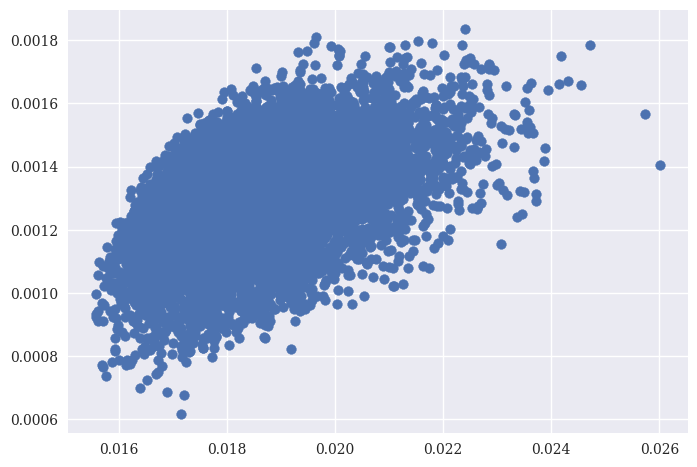

In [ ]:
## Plotando o gráfico de Risco e Retorno
# x = risco
# y = retorno
plt.scatter(portifolios["Risco"], portifolios["Retorno"])  # aparece 10000 pontos

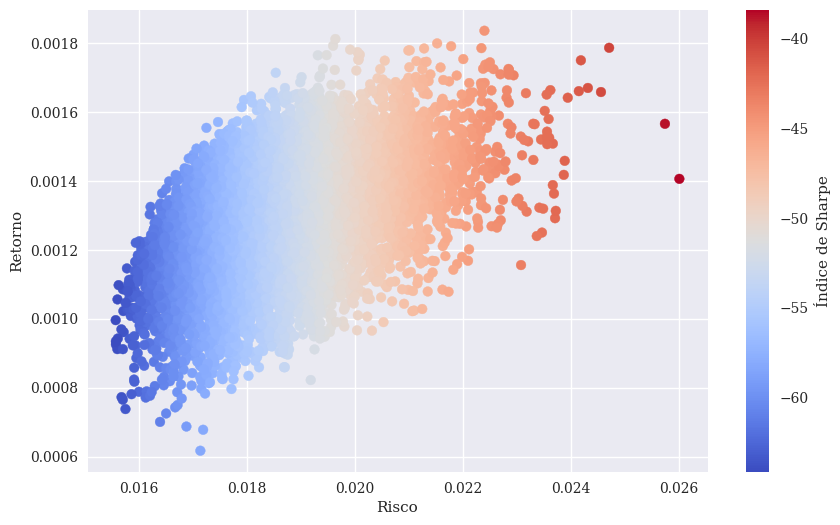

In [ ]:
## Plotando o gráfico de Risco e Retorno com o Índice de Sharpe para cada portifólio
# x = p_vol
# y = p_ret

# rf = 0.08  # taxa livre de risco (risk free) por ano
rf= (0.08+1)**(1/252)  # taxa livre de risco (risk free) convertida ao dia

plt.figure(figsize=(10,6))   # 10 de largura e 6 de comprimento
plt.scatter(p_vol, p_ret, c=(p_ret-rf)/p_vol, marker='o', cmap='coolwarm') # fórmula do índice de Sharpe
# cmap mapa de valor, verde quando o número do índice de Sharpe é pequeno e vermelho para quando o número do índice de Sharpe é grande
plt.xlabel("Risco")
plt.ylabel("Retorno")
plt.colorbar(label="Índice de Sharpe")

In [ ]:
## Encontrando a carteira de variância mínima (risco mínimo / menor risco)
min_risk=portifolios[portifolios['Risco']==portifolios['Risco'].min()]
min_risk
# para o meu caso seria a carteira de número 1534, com 0,0996% de retorno e 1,5577% de risco

,Retorno,Risco
1534,0.000996,0.015577


In [ ]:
## Quais são os pesos dos ativos na carteira de número 1534 que é a de variância mínima?
p_pesos[1534]
# pelo exemplo seria: 3.50659963e-01 de AMBEV, 1.27121156e-03 de BRADESCO, 3.16343757e-01 de ITAU, 3.00504472e-04 de PETRO, 2.06812658e-02 de VALE, e 3.10743298e-01 de WEGE

array([3.50659963e-01, 1.27121156e-03, 3.16343757e-01, 3.00504472e-04,
       2.06812658e-02, 3.10743298e-01])

In [ ]:
## Montando um dataframe com essas informações dos pesos, risco e retorno
df=pd.DataFrame({"AMBEV":p_pesos[1534][0], "BRADESCO":p_pesos[1534][1], "ITAU":p_pesos[1534][2], "PETRO":p_pesos[1534][3], "VALE":p_pesos[1534][4], "WEGE":p_pesos[1534][5], "Retorno":min_risk["Retorno"], "Risco":min_risk["Risco"]})
df

,AMBEV,BRADESCO,ITAU,PETRO,VALE,WEGE,Retorno,Risco
1534,0.35066,0.001271,0.316344,0.000301,0.020681,0.310743,0.000996,0.015577


In [ ]:
########################## FUNÇÕES PARA ESTIMAR O RISCO E RETORNO DE UM PORTIFÓLIO
# ao invés de usar a matemátia, como usar as funções do Phyton [parte que calculamos min, max, var, matriz de cov e etc]

def port_ret(pesos):  # retorno do portifólio
  return np.sum(e_r*pesos)

def port_vol(pesos):  # risco do portifólio, vol=volatilidade=risco
  return math.sqrt(np.dot(pesos.T, np.dot(matriz_cov, pesos)))

In [ ]:
## Estimando a carteira de MENOR RISCO GLOBAL POR OTIMIZAÇÃO (dos pesos)
restri =({'type':'eq', 'fun':lambda x: np.sum(x)-1})  # restrição
bnds=tuple((0,1) for x in range(noa))  # limites, os números vão de qual valor até qual valor, de 0 (0%) a 1 (100%)
pesos_i=np.array(noa*[1/noa,]) # pesos inicial, pesos iguais para os 5 ativos
pesos_i

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [ ]:
## OTIMIZAÇÃO DA CARTEIRA
otim_v=sco.minimize(port_vol, pesos_i, method="SLSQP", bounds=bnds, constraints=restri)    # otimizando (minimizando) a volatilidade (risco)
otim_v
# o x corresponde ao pesos

## Pesos otimizados
otim_v["x"].round(3)  # três casas decimais

# pelo exemplo: 43,2% de AMBEV, 0% de BRADESCO, 30,8% de ITAU, 0% de PETRO, 8,5% de VALE e 17,5% de WEGE
# se diferencia dos pesos encontrados na carteira de variância mínima que calculamos anteriormente (carteira 26): 41,855848% de AMBEV, 1,8845117% de BRADESCO, 34,553563% de ITAU, 1,552092% de PETRO, 4,289057% de VALE, e 15,86493% de WEGE

array([0.432, 0.   , 0.308, 0.   , 0.085, 0.175])

In [ ]:
## Retorno da cartera de MENOR RISCO GLOBAL
port_ret(otim_v["x"])  # retorno da carteira de menor risco global
# pelo exemplo: o retorno é igual a 0,08883725299059397%
# se diferencia do retorno encontrado na carteira de variância mínima que calculamos anteriormente (carteira 1534): 0,0996%

0.0008883725299059397

In [ ]:
## Risco da cartera de MENOR RISCO GLOBAL
port_vol(otim_v["x"])  # retorno da carteira de menor risco global
# pelo exemplo: o retorno é igual a 1,5253963134534147%
# se diferencia do risco encontrado na carteira de variância mínima que calculamos anteriormente (carteira 1534): 1,5577%

# ou seja, o risco encontrado pela otimização é menor do que o encontrado na carteira de variância mínima

0.015253963134534147

In [ ]:
## Encontrando a carteira com o maior índice de Sharpe
SR= (p_ret-rf)/p_vol #calculando o índice
SR.max()

-38.405626265864086

In [ ]:
## Estimando a carteira de Índice de Sharpe máximo - USANDO FUNÇÕES

# Função de Sharpe
def min_func_sharpe(pesos):
  return -(port_ret(pesos)-rf)/port_vol(pesos)

# Otimização do Índice de Sharpe
otim_s=sco.minimize(min_func_sharpe, pesos_i, method="SLSQP", bounds=bnds, constraints=restri)
otim_s
# o maior sharpe foi de 30.89182164138138 e os pesos foram [ 0.000e+00  1.145e-12  0.000e+00  1.000e+00  1.875e-12 0.000e+00]

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 30.89182164138138
       x: [ 0.000e+00  1.145e-12  0.000e+00  1.000e+00  1.875e-12
            0.000e+00]
     nit: 2
     jac: [-7.042e+00 -1.458e+01 -1.057e+01 -3.094e+01 -1.573e+01
           -8.858e+00]
    nfev: 14
    njev: 2

In [ ]:
## Pesos otimizados pelo MAIOR ÍNDICE DE SHARPE
otim_s["x"].round(3)  # três casas decimais

# pelo exemplo: 0% de AMBEV, 0% de BRADESCO, 0% de ITAU, 100% de PETRO, 0% de VALE, e 0% de WEGE

array([0., 0., 0., 1., 0., 0.])

In [ ]:
## Retorno da cartera de MAIOR ÍNDICE DE SHARPE
port_ret(otim_s["x"])

# pelo exemplo: o retorno é igual a 0,15294752205471907%

0.0015294752205471907

In [ ]:
## Risco da cartera de MAIOR ÍNDICE DE SHARPE
port_vol(otim_s["x"])

# pelo exemplo: o risco é igual a 3,233140421340657%

0.03233140421340657

In [ ]:
## Máximo índice de Sharpe
(port_ret(otim_s["x"])-rf)/port_vol(otim_s["x"])

# pelo exemplo: o máximo sharpe foi de -30.89182164138138, veja que é o mesmo valor encontrado anteriormente

-30.89182164138138

In [ ]:
# Modelo de otimização da carteira de Markowitz - FRONTEIRA EFICIENTE

# para determinado retorno, tem o menor nível de risco ...
# ou.. para determinado risco, tem o maior nível de retorno (minimizar risco para determinado retorno)

#### ESTIMANAÇÃO DA FRONTEIRA EFICIENTE DE MARKOWITZ
cons=({'type': 'eq', 'fun': lambda x: port_ret(x)-tret}, { 'type': 'eq', 'fun': lambda x: np.sum(x)-1})
bnds=tuple((0,1) for x in pesos)  # limites, os números vão de qual valor até qual valor, de 0 (0%) a 1 (100%)

# Retorno da fronteira eficiente
trets=np.linspace(p_ret.min(), p_ret.max(), 50)  # 50 pontos #pega do retorno mín ao retorno máx, e cada ponto encontra seu nível de risco

# Risco da fronteira eficiente
tvols=[]
for tret in trets:
  res=sco.minimize(port_vol, pesos_i, method="SLSQP", bounds=bnds, constraints=cons)
  tvols.append(res['fun'])

tvols=np.array(tvols)  #deixa de ser um dado solto e vira uma série numérica
tvols

array([0.01561158, 0.0155544 , 0.01550199, 0.01545576, 0.01541536,
       0.01538034, 0.01535072, 0.01532653, 0.01530812, 0.01529552,
       0.01528837, 0.01528669, 0.01529048, 0.01529973, 0.01528091,
       0.01530018, 0.01532485, 0.01535489, 0.01539028, 0.01543098,
       0.01547695, 0.01552814, 0.0155845 , 0.01564597, 0.01571251,
       0.01578405, 0.01586072, 0.01594217, 0.01602804, 0.01611858,
       0.01621394, 0.01631382, 0.01641801, 0.01652638, 0.0166388 ,
       0.01675513, 0.01687526, 0.01699953, 0.01712824, 0.0172608 ,
       0.01739642, 0.01753547, 0.01768012, 0.01783898, 0.01801234,
       0.01819771, 0.01840313, 0.0186046 , 0.01882065, 0.01905067])

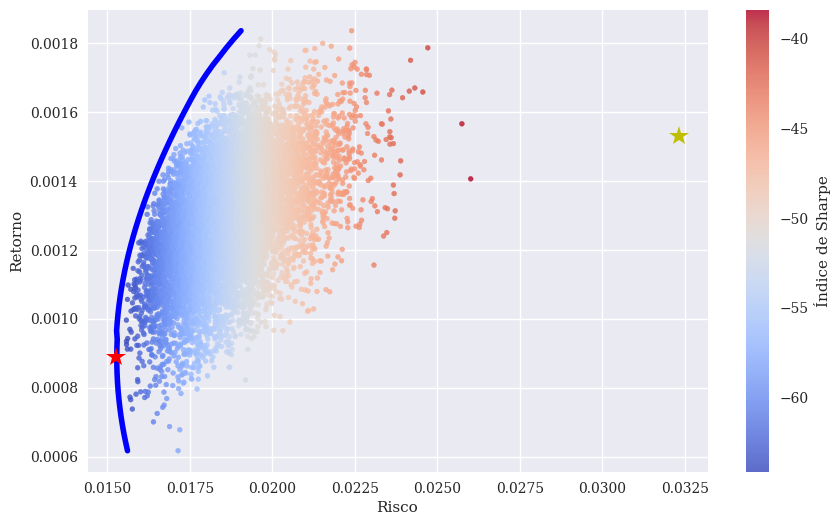

In [ ]:
## Plotando o gráfico da FRONTEIRA EFICIENTE
plt.figure(figsize=(10,6)) # 10 de largura e 6 de comprimento.
plt.scatter(p_vol, p_ret, c=(p_ret-rf)/p_vol, marker='.', alpha=0.8, cmap='coolwarm') # se uso "." as bolinhas ficam menores
plt.plot(tvols, trets, "b", lw=4.0)  # traça a fronteira eficiente
plt.plot(port_vol(otim_s['x']), port_ret(otim_s['x']), 'y*', markersize=15.0)  # coloca o máximo Sharpe marcado pela estrela amarela (REVER)
plt.plot(port_vol(otim_v['x']), port_ret(otim_v['x']), 'r*', markersize=15.0)  # colocando a carteira de variância mínima pela estrela vermelha (menor risco)

plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.colorbar(label='Índice de Sharpe')

In [ ]:
## LINHA DE ALOCAÇÃO DE CAPITAL - Capital allocation line
# se inicia do Rf (taxa livre de risco) e tangengia a carteira de que tem maior índice de Sharpe

eixo_x=[]
eixo_y=[]
utility=[]
a = 10 # nível de aversão ao risco

for er in np.linspace(rf, max(trets), 20):    # 20 linhas
  sd=(er-rf)/((port_ret(otim_s['x'])-rf/port_vol(otim_s['x'])))  # risco - volatilidade
  u = er -0.5*a*(sd**2) # utilidade
  eixo_x.append(sd)
  eixo_y.append(er)
  utility.append(u)

data3={'Utilidade': utility, 'Retorno': eixo_y, 'Risco': eixo_x}
cal=pd.DataFrame(data3)   # cal= Capital allocation line = LINHA DE ALOCAÇÃO DE CAPITAL
cal  # começa pelo risco zero e vai até o máximo sharpe

,Utilidade,Retorno,Risco
0,1.000305,1.000305,-0.000000
1,0.947740,0.947754,0.001699
2,0.895146,0.895203,0.003397
3,0.842522,0.842652,0.005096
4,0.789870,0.790101,0.006794
5,0.737189,0.737550,0.008493
6,0.684480,0.684999,0.010192
7,0.631741,0.632448,0.011890
8,0.578974,0.579897,0.013589
9,0.526177,0.527346,0.015288


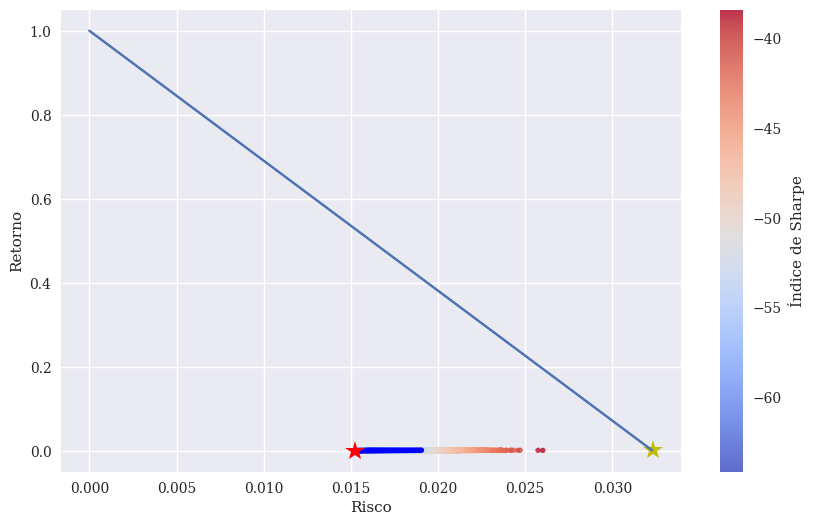

In [ ]:
## Plotando o gráfico da LINHA DE ALOCAÇÃO DE CAPITAL - Capital allocation line
plt.figure(figsize=(10,6)) # 10 de largura e 6 de comprimento.
plt.scatter(p_vol, p_ret, c=(p_ret-rf)/p_vol, marker='.', alpha=0.8, cmap='coolwarm') # se uso "." as bolinhas ficam menores
plt.plot(tvols, trets, "b", lw=4.0)  # traça a fronteira eficiente
plt.plot(port_vol(otim_s['x']), port_ret(otim_s['x']), 'y*', markersize=15.0)  # coloca o máximo Sharpe marcado pela estrela amarela (REVER)
plt.plot(port_vol(otim_v['x']), port_ret(otim_v['x']), 'r*', markersize=15.0)  # colocando a carteira de variância mínima pela estrela vermelha (menor risco)

plt.plot(eixo_x, eixo_y) # o que é a carteira otima? é aquela que maximiza a sua utilidade, considerando seu grau de aversão ao risco

plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.colorbar(label='Índice de Sharpe')
plt.show()

In [ ]:
## Estimando a CARTEIRA ÓTIMA COMPLETA - ela considera o perfil de risco do investidor

wp=(port_ret(otim_s['x'])-rf)/(a*port_vol(otim_s['x'])**2)  #percentual que vou investir

r_oc=wp*port_ret(otim_s['x'])+(1-wp)*rf    # r_oc = retorno da carteira ótima completa
v_oc=wp*port_vol(otim_s['x'])        # v_oc = volatilidade da carteira ótima completa

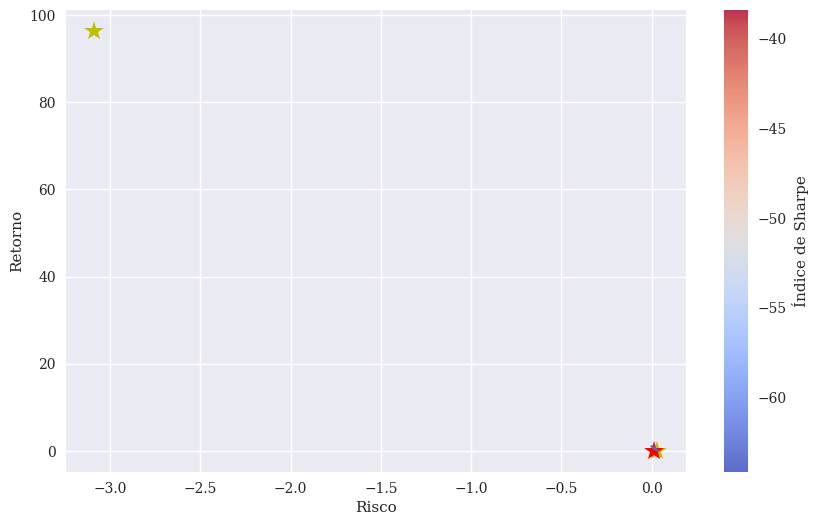

In [ ]:
## Plotando o gráfico COM A CARTEIRA ÓTIMA COMPLETA
plt.figure(figsize=(10,6)) # 10 de largura e 6 de comprimento.
plt.scatter(p_vol, p_ret, c=(p_ret-rf)/p_vol, marker='.', alpha=0.8, cmap='coolwarm') # se uso "." as bolinhas ficam menores
plt.plot(tvols, trets, "b", lw=4.0)  # traça a fronteira eficiente
plt.plot(port_vol(otim_s['x']), port_ret(otim_s['x']), 'y*', markersize=15.0)  # coloca o máximo Sharpe marcado pela estrela amarela (REVER)
plt.plot(port_vol(otim_v['x']), port_ret(otim_v['x']), 'r*', markersize=15.0)  # colocando a carteira de variância mínima pela estrela vermelha (menor risco)

plt.plot(eixo_x, eixo_y) # o que é a carteira otima? é aquela que maximiza a sua utilidade, considerando seu grau de aversão ao risco

plt.plot(v_oc, r_oc, 'y*', markersize=15.0) # carteira que max sua utilidade considerando seu grau de aversão ao risco

plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.colorbar(label='Índice de Sharpe')
plt.show()